<a href="https://colab.research.google.com/github/mralamdari/Computer-Vision-Projects/blob/main/Emotion_Detection_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn import metrics
from google.colab.patches import cv2_imshow

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive'
!kaggle datasets download -d msambare/fer2013
!unzip \*.zip && rm *.zip

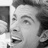

In [3]:
tf.keras.preprocessing.image.load_img('/content/train/happy/Training_10239785.jpg')

In [4]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                                                  horizontal_flip=True,
                                                                  zoom_range=0.2)

train_dataset = train_generator.flow_from_directory('/content/train',
                                                   target_size=(48, 48),
                                                   class_mode='categorical',
                                                   batch_size=32, 
                                                   shuffle=True)

Found 28709 images belonging to 7 classes.


In [5]:
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

test_dataset = test_generator.flow_from_directory('/content/test/',
                                                 target_size=(48, 48),
                                                 class_mode='categorical',
                                                 batch_size=1,
                                                 shuffle=False)

Found 7178 images belonging to 7 classes.


In [6]:
x = np.unique(train_dataset.classes, return_counts=True)

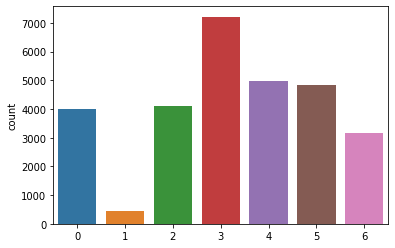

In [7]:
sns.countplot(x=train_dataset.classes)

In [8]:
class Network(tf.keras.Model):
  def __init__(self, classes, chanDim=-1):
    super(Network, self).__init__()
    
    self.conv1 = tf.keras.layers.Conv2D(32, 3, padding='same')
    self.bn1 = tf.keras.layers.BatchNormalization()
    self.activation = tf.keras.layers.Activation('relu')
    self.conv2 = tf.keras.layers.Conv2D(64, 3, padding='same')
    self.bn2 = tf.keras.layers.BatchNormalization()
    self.pool1 = tf.keras.layers.MaxPooling2D(pool_size=2)
    self.pool2 = tf.keras.layers.MaxPooling2D(pool_size=2)
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(64)
    self.drop = tf.keras.layers.Dropout(0.5)
    self.softmax = tf.keras.layers.Activation('softmax')
    self.dense2 = tf.keras.layers.Dense(classes)

  def call(self, inputs):
    x = self.conv1(inputs)
    x = self.activation(x)
    x = self.bn1(x)
    x = self.pool1(x)
    x = self.conv2(x)
    x = self.activation(x)
    x = self.bn2(x)
    x = self.pool2(x)
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.drop(x)
    x = self.dense2(x)
    x = self.softmax(x)
    return x

In [9]:
model = Network(len(train_dataset.class_indices))

In [10]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
# model.summary()

In [12]:
model.fit(train_dataset, epochs=20)

Epoch 1/20
898/898 [==============================] - 184s 204ms/step - loss: 3.8348 - accuracy: 0.2760
Epoch 2/20
898/898 [==============================] - 202s 225ms/step - loss: 1.5849 - accuracy: 0.3925
Epoch 3/20
898/898 [==============================] - 182s 202ms/step - loss: 1.5167 - accuracy: 0.4175
Epoch 4/20
898/898 [==============================] - 202s 225ms/step - loss: 1.4754 - accuracy: 0.4366
Epoch 5/20
898/898 [==============================] - 169s 188ms/step - loss: 1.4342 - accuracy: 0.4538
Epoch 6/20
898/898 [==============================] - 162s 181ms/step - loss: 1.3857 - accuracy: 0.4733
Epoch 7/20
898/898 [==============================] - 162s 180ms/step - loss: 1.3636 - accuracy: 0.4849
Epoch 8/20
898/898 [==============================] - 162s 180ms/step - loss: 1.3394 - accuracy: 0.4960
Epoch 9/20
898/898 [==============================] - 186s 208ms/step - loss: 1.3227 - accuracy: 0.4997
Epoch 10/20
898/898 [==============================] - 184s 205m

In [13]:
model.evaluate(test_dataset)

7178/7178 [==============================] - 32s 4ms/step - loss: 1.2687 - accuracy: 0.5389


[1.2687082290649414, 0.53886878490448]

In [14]:
pred = model.predict(test_dataset)
pred

7178/7178 [==============================] - 32s 4ms/step


array([[1.7169730e-01, 1.0862484e-03, 1.2469755e-02, ..., 2.4987575e-01,
        9.5578521e-02, 8.5691194e-04],
       [3.0335075e-01, 4.3874909e-04, 4.0308696e-01, ..., 1.3294150e-01,
        9.0219654e-02, 4.2619884e-02],
       [6.6807427e-02, 1.6471498e-03, 6.7544892e-02, ..., 1.6071388e-01,
        6.8358433e-01, 2.0837260e-03],
       ...,
       [2.4806284e-03, 5.2634175e-07, 1.5430190e-02, ..., 8.3509181e-03,
        1.3418555e-03, 9.5937979e-01],
       [4.4347368e-02, 8.4973540e-04, 2.3235355e-02, ..., 1.3347635e-02,
        1.8694091e-03, 9.0597701e-01],
       [2.3754777e-03, 1.0227612e-05, 1.7671157e-02, ..., 7.0153922e-04,
        1.8420687e-04, 9.7691512e-01]], dtype=float32)

In [15]:
pred_labels = np.argmax(pred, axis=-1)
pred_labels 

array([3, 2, 5, ..., 6, 6, 6])

In [17]:
metrics.accuracy_score(test_dataset.labels, pred_labels)

0.5388687656728894

In [18]:
metrics.confusion_matrix( test_dataset.labels, pred_labels)

array([[ 304,    3,  111,  142,  222,  127,   49],
       [  26,   20,   16,   18,   11,   16,    4],
       [  87,    0,  283,  159,  220,  139,  136],
       [  41,    0,   37, 1509,   89,   51,   47],
       [  51,    0,   71,  206,  749,  129,   27],
       [  98,    2,  131,  220,  378,  399,   19],
       [  12,    0,   81,   71,   50,   13,  604]])

#Evaluating

In [19]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalcatface.xml

--2023-01-28 15:43:50--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalcatface.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 411388 (402K) [text/plain]
Saving to: ‘haarcascade_frontalcatface.xml’

haarcascade_frontal 100%[===================>] 401.75K  --.-KB/s    in 0.04s   

2023-01-28 15:43:50 (10.9 MB/s) - ‘haarcascade_frontalcatface.xml’ saved [411388/411388]



In [20]:
cascade = cv2.CascadeClassifier('haarcascade_frontalcatface.xml')

In [21]:
img_1 = cv2.imread('1.jpg')
img_2 = cv2.imread('2.jpg')
img_3 = cv2.imread('3.jpg')

In [42]:
img = img_1
pred = cascade.detectMultiScale(img, scaleFactor=1.009, minNeighbors=4)

for x, y, w, h  in pred:
  roi = img[y: y+h, x: x+w]
  cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 1)
  roi = cv2.resize(roi, (48, 48)) / 255
  roi = np.expand_dims(roi, axis=0)
  pred = model.predict(roi)
  index = np.argmax(pred, axis=-1)[0]
  name = list(train_dataset.class_indices.keys())[index]
  cv2.putText(img, name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2, cv2.LINE_AA)
  print(f'The Image is: {name}')

cv2_imshow(img)

1/1 [==============================] - 0s 19ms/step
The Image is: neutral
1/1 [==============================] - 0s 20ms/step
The Image is: sad


NameError: ignored